# Chart examples

Play with pandas, matplotlib and ta and draw financial charts.

In [1]:
import pandas as pd
import pandas_ta as ta
from matplotlib import pyplot as plt
import mplfinance as mpf

In [2]:
df = pd.read_csv('../input/btc-usd-5m.csv')

In [3]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-04-17 19:45:00+00:00,40175.125000,40293.312500,40175.125000,40293.312500,40293.312500,0
1,2022-04-17 19:50:00+00:00,40316.824219,40382.191406,40316.824219,40382.191406,40382.191406,133923840
2,2022-04-17 19:55:00+00:00,40380.207031,40380.320312,40369.675781,40369.675781,40369.675781,107765760
3,2022-04-17 20:00:00+00:00,40370.089844,40393.433594,40370.089844,40393.433594,40393.433594,25071616
4,2022-04-17 20:05:00+00:00,40406.847656,40406.847656,40402.527344,40402.527344,40402.527344,47454208


<AxesSubplot:xlabel='Datetime'>

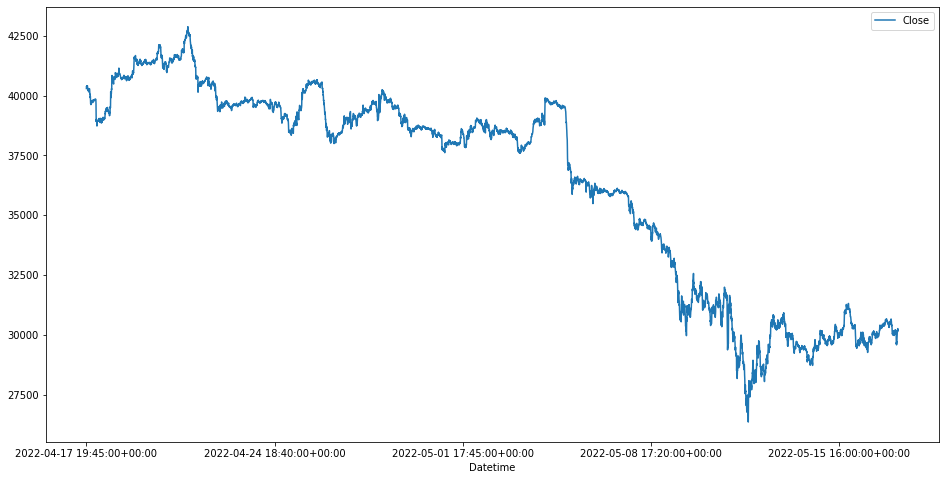

In [4]:
# Example chart
df.plot(x="Datetime", y='Close', figsize=(16, 8))

In [5]:
# VWAP requires the DataFrame index to be a DatetimeIndex.
# Replace "datetime" with the appropriate column from your DataFrame
df.set_index(pd.DatetimeIndex(df["Datetime"]), inplace=True)

In [6]:
df.shape

(8623, 7)

In [7]:
df.head(3)

,Datetime,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,,
2022-04-17 19:45:00+00:00,2022-04-17 19:45:00+00:00,40175.125000,40293.312500,40175.125000,40293.312500,40293.312500,0
2022-04-17 19:50:00+00:00,2022-04-17 19:50:00+00:00,40316.824219,40382.191406,40316.824219,40382.191406,40382.191406,133923840
2022-04-17 19:55:00+00:00,2022-04-17 19:55:00+00:00,40380.207031,40380.320312,40369.675781,40369.675781,40369.675781,107765760


In [8]:
df.tail(3)

,Datetime,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,,
2022-05-17 19:40:00+00:00,2022-05-17 19:40:00+00:00,30219.685547,30219.685547,30193.136719,30193.136719,30193.136719,61788160
2022-05-17 19:45:00+00:00,2022-05-17 19:45:00+00:00,30191.072266,30191.072266,30191.072266,30191.072266,30191.072266,0
2022-05-17 19:46:00+00:00,2022-05-17 19:46:00+00:00,30169.953125,30169.953125,30169.953125,30169.953125,30169.953125,0


# pandas_ta

In [9]:
e = pd.DataFrame()
e.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [10]:
help(ta.vwap)

Help on function vwap in module pandas_ta.overlap.vwap:

vwap(high, low, close, volume, anchor=None, offset=None, **kwargs)
    Volume Weighted Average Price (VWAP)
    
    The Volume Weighted Average Price that measures the average typical price
    by volume.  It is typically used with intraday charts to identify general
    direction.
    
    Sources:
        https://www.tradingview.com/wiki/Volume_Weighted_Average_Price_(VWAP)
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/volume-weighted-average-price-vwap/
        https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:vwap_intraday
    
    Calculation:
        tp = typical_price = hlc3(high, low, close)
        tpv = tp * volume
        VWAP = tpv.cumsum() / volume.cumsum()
    
    Args:
        high (pd.Series): Series of 'high's
        low (pd.Series): Series of 'low's
        close (pd.Series): Series of 'close's
        volume (pd.Series): Series of 'volume'

In [11]:
vwap = ta.vwap(df['High'], df['Low'], df['Close'], df['Volume'])

/opt/homebrew/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


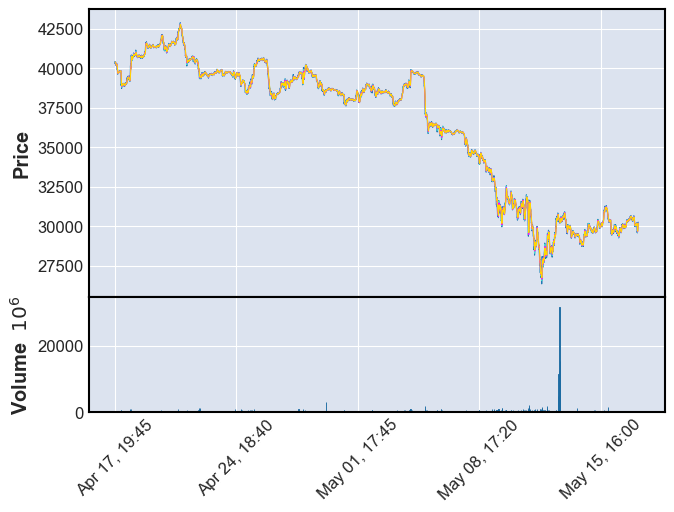

In [12]:
mpf.plot(df,type='line',mav=(3,6,9),volume=True)


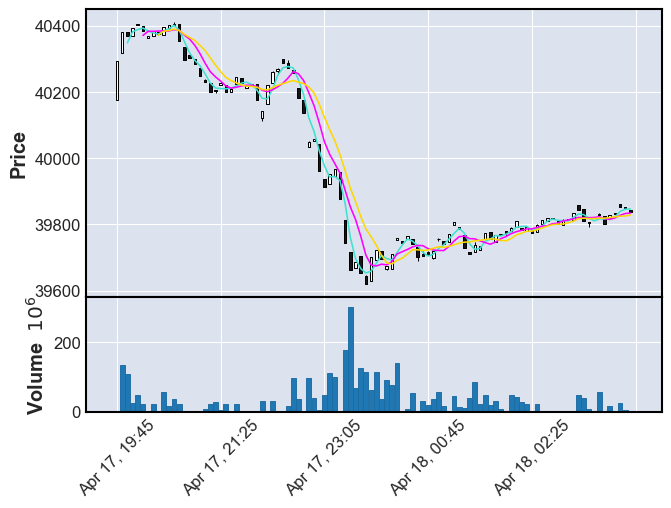

In [13]:
mpf.plot(df[:100],type='candle',mav=(3,6,9),volume=True)

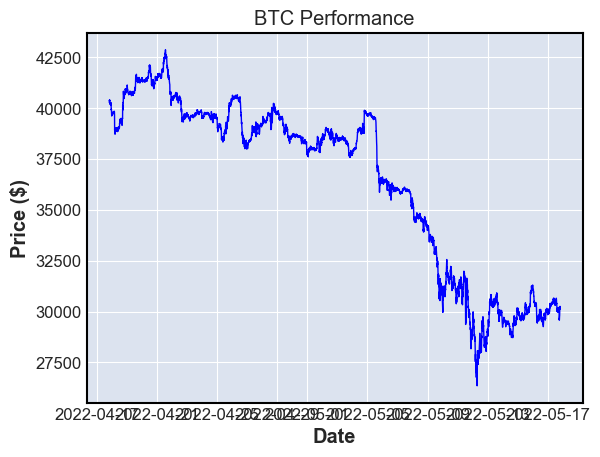

In [14]:
plt.plot(df["Close"], color='blue', linewidth=1)
plt.title('BTC Performance')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.show()